# Laboratorio reresion lineal

Se procede a realizar un analisis de regresion  para la base de datos. Boston ousing data.

In [1]:
# librerias base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import easygui
import statsmodels.api as sm
# librerias de trabajo
import janitor
import seaborn as sns
# Otras librerias
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)

# Librerias para entrenar y crear el modelo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics # para metricas 
from scipy.stats import shapiro # test de shapiro


c:\Users\jhongamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\lazy_loader\__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)


In [3]:
ruta = easygui.fileopenbox()
df = pd.read_csv(ruta)
df = janitor.clean_names(df) # se corrigen los nombres de la base de datos. 
df.head(3)

ValueError: Invalid file path or buffer object type: <class 'NoneType'>

# Descrptivo

Se procede a realizar un analisis descriptivo que permita enteder la base de datos. Se tienen las siguientes variables

 * medv : Valor medio del valor de una casa en boston
 * rmvar : Numero promedio de habitaciones por casa
 * age : edad proporcional para el numero de habitantes
 * lstat : numero de habitantes con bajo nivel de ingreso
 * 


In [ ]:
print(df.shape, "dimension df") # 506 datos en 14 variables

# Recuerde que la base de datos esta dentro del paquete entonces:
Boston = load_data("Boston")
Boston.columns

(506, 14) dimension df


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [ ]:
correlation_matrix = df.corr()
df.columns

Index(['unnamed_0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'lstat', 'medv'],
      dtype='object')

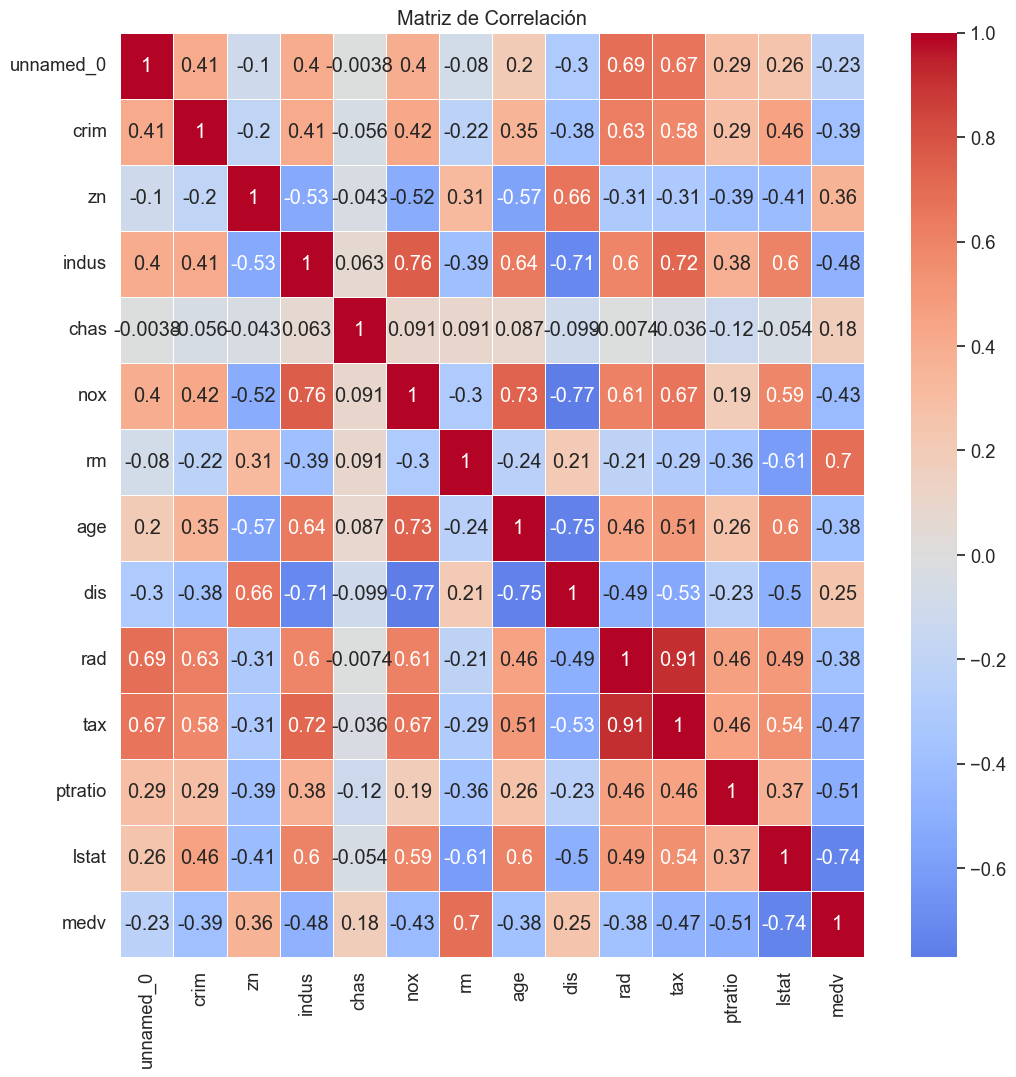

In [ ]:

plt.figure(figsize=(12, 12))
sns.set(font_scale=1.2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

 De manera rapida se puede ver la correlacion dado el mapa de calor. Se ha de tener presente relaciones fuerte de correlacion con:

  * unnamed - tax
  * unamed - rad

Bueno... Lo intentamos. Que flojera.

# Regresion lineal simple

Primero, se construye la matriz de diseño. Se usará el comando sm.OLS() para construir un modelo de regresion lineal simple. 

Variable respuesta: medv

Predictora : lstat

¿Como se escribiria la matriz de diseño?

In [ ]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),# matriz de 1 de dimension de los datos
'lstat': Boston['lstat'] }) # variable predictora

In [ ]:
print(X[:4])# esta es la matriz de diseño asociada a una regresion lineal simple.
print(X.head(4))

   intercept  lstat
0        1.0   4.98
1        1.0   9.14
2        1.0   4.03
3        1.0   2.94
   intercept  lstat
0        1.0   4.98
1        1.0   9.14
2        1.0   4.03
3        1.0   2.94


In [ ]:
# extrayendo la respuesta

y = Boston["medv"]

# creando el modelo 

model = sm.OLS(y,X) # aca se especifica el modelo

results = model.fit() # y aca es donde se ajusta el modelo

In [ ]:
(summarize(results))

c:\Users\jhongamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
c:\Users\jhongamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  else dtype(mean))
c:\Users\jhongamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1069: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


Este comando es el equivalente a un summary en rstudio. Con esto tenemos una tabla resumen del modelo. Claramente tanto el parametro como la variable son significativas. 

## Ajustando modelos con sklearn

Una idea intuitiva asociada a sklearn es ajustar modelos con mayor facilidad. Note que:

In [ ]:
diseño = MS(["lstat"])
diseño # Se especifica primero el objeto con cual crear la matriz

ModelSpec(terms=['lstat'])

In [ ]:
diseño = diseño.fit(Boston) # aca se ajusta el modelo pedido. In this simple case, the fit() method does very little; it simply checks that
#the variable 'lstat' specifed in design exists in Boston
diseño

ModelSpec(terms=['lstat'])

In [ ]:
X = diseño.transform(Boston)
X.head(5)# aca transformamos y obtenemos la matriz de diseño. Then transform() 
#constructs the model matrix with two columns: an intercept and the variable lstat.

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [81]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# quite los putos warnings

In [ ]:
model = sm.OLS(y,X)  # y aca ajustamos de nuevo el modelo
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           5.08e-88
Time:                        10:51:55   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Esta salida es muy completa. Vamos a entrar en detalles.

Se tiene informacion acerca de la variable dependiente (medv).

R cuadrado y ajustado

Metodo de ajuste del modelo

Estadistico F (significancia del modelo)

EL valor p del estadistico F (Prb F)

La logverosimilitud

Observaciones, AIC, BIC

Tabla significancia de parametros del modelo

*Prueba de omnibus* La estadística "Omnibus" que se muestra en tu salida se refiere a la prueba de omnibus de normalidad. Esta prueba se utiliza para evaluar si los residuos de un modelo de regresión (o cualquier conjunto de datos) siguen una distribución normal.

*Prueba de Durbin-Watson* La prueba de Durbin-Watson es una estadística utilizada para verificar la presencia de autocorrelación en los residuos de un modelo de regresión

Cerca de 2: Un valor cercano a 2 indica que es probable que no haya autocorrelación significativa en los residuos. En tu caso, el valor de 0.892 está cercano a 2, lo que sugiere que la autocorrelación no es un problema grave en tus residuos.

Menos de 2: Un valor menor a 2 sugiere la presencia de autocorrelación positiva en los residuos. Esto significa que los residuos en un punto de tiempo están correlacionados con los residuos en el punto de tiempo anterior, lo que puede indicar una estructura temporal o espacial en los datos que el modelo no está capturando completamente.

Más de 2: Un valor mayor a 2 sugiere la presencia de autocorrelación negativa en los residuos. Esto indica que los residuos en un punto de tiempo están correlacionados de manera inversa con los residuos en el punto de tiempo anterior.

el valor de la estadística Durbin-Watson es 0.892. Esto sugiere que hay cierta autocorrelación positiva en los residuos, aunque la magnitud es relativamente pequeña. Un valor cercano a 2 (como en este caso) generalmente indica que la autocorrelación no es un problema grave en el modelo de regresión

## Generando predicciones

Vamos a predecir. 

The get_prediction() method can be used to obtain predictions, and .get_ produce confdence intervals and prediction intervals for the prediction of prediction()
medv for given values of lstat.
We frst create a new data frame, in this case containing only the variable lstat, with the values for this variable at which we wish to make
predictions. We then use the transform() method of design to create the
corresponding model matrix.


In [ ]:
new_df = pd.DataFrame({'lstat':[5, 10, 15, 12]}) # se genera un nuevo df
print(new_df) # las observaciones generadas son 5,10,15
newX = diseño.transform(new_df) # se ajusta con la matriz de diseño, con los nuevos datos
newX

   lstat
0      5
1     10
2     15
3     12


,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15
3,1.0,12


In [ ]:
new_predictions = results.get_prediction(newX); # vamos a generar las predicciones. Recuerde que results es el modelo. Get_predictions genera
# las predicciones con la data de newX
new_predictions.predicted_mean # y estas son en promedio las predicciones

array([29.80359411, 25.05334734, 20.30310057, 23.15324863])

In [ ]:
new_predictions.conf_int( alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299],
       [22.60808938, 23.69840789]])

In [ ]:
# generando intervalos de prediccion; con obs=True <-> Este es el comando que genera Intervalos de prediccion
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905],
       [10.92909378, 35.37740349]])

# Graficando nuestra regresion lineal simple

Vamos a mirar graficamente lo que hicimos

In [ ]:
# NUestra primera funcion, KEMOZIOOON

def abline(ax, b, m, *args, **kwargs): # Se crea una funcion para hacer una linea
    "Add a line with slope m and intercept b to ax" # defina ecuacion de la recta
    xlim = ax.get_xlim() # ax es un objeto de matplotlib al cual, se le esta extrayendo el limite en x
    ylim = [m * xlim[0] + b, m * xlim[1] + b] # ecuacion de la recta, tomando primer y ultimo valor de x
    ax.plot(xlim, ylim) # plotea la linea
    ax.plot(xlim, ylim, *args, **kwargs) #The addition of *args allows any number of non-named arguments to
#abline, while *kwargs allows any number of named arguments (such as linewidth=3) to abline

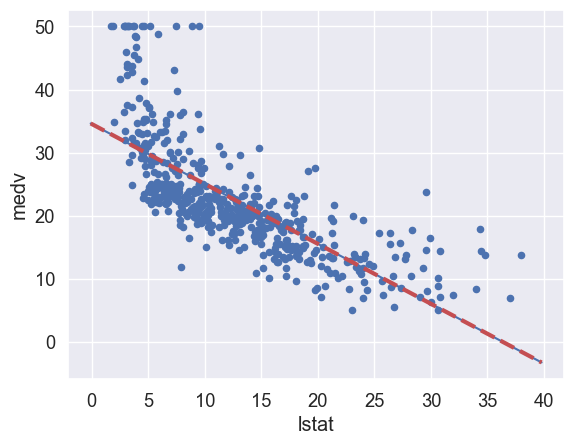

In [ ]:
ax = Boston.plot.scatter('lstat', 'medv') # se obtiene el objeto que se desea graficar, para este caso, el scatter plot
abline(ax,
results.params[0], #de resultado, saque interceot
results.params[1], # de resultado, saque pendiente
'r--', # queremos linea dashed
linewidth=3) # queremos grueso de ese tamaño

# Plots de diagnostico

Se procede a revisar los supuestos del modelo. De esta manera:


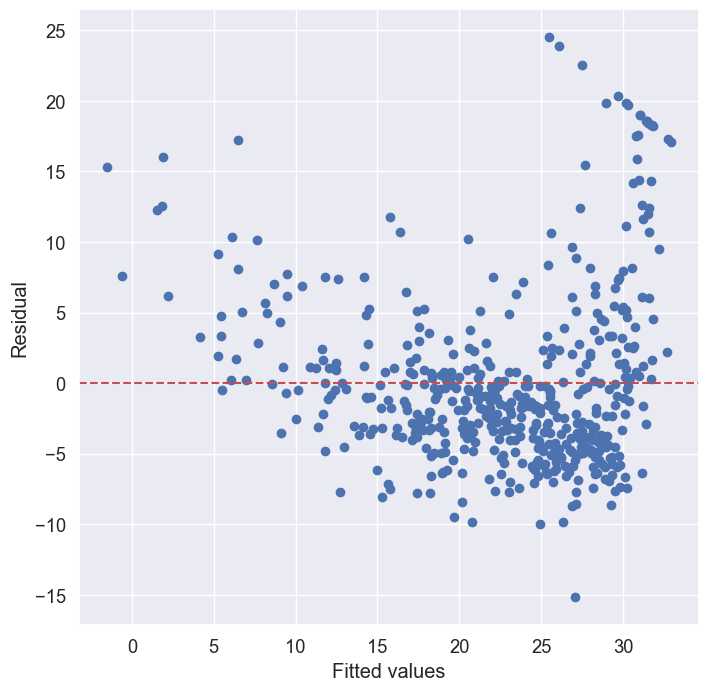

In [ ]:
ax = plt.subplots(figsize=(8,8))[1] # defina marco del grafico
ax.scatter(results.fittedvalues, results.resid) # scatter plot ajustados vs residuales
ax.set_xlabel("Fitted values")# etiquetas
ax.set_ylabel("Residual")
ax.axhline(0, c="r", ls = "--") # linea horizontal, punteada, roja

Se puede apreciar que hay evidencia para sospechar que el ajuste no es bueno. Existe no linealidad en el proceso. Note that there is a "U" patter that indicates that the fitted model it's not the propper to work with. 

374 <- observacion con max leverage


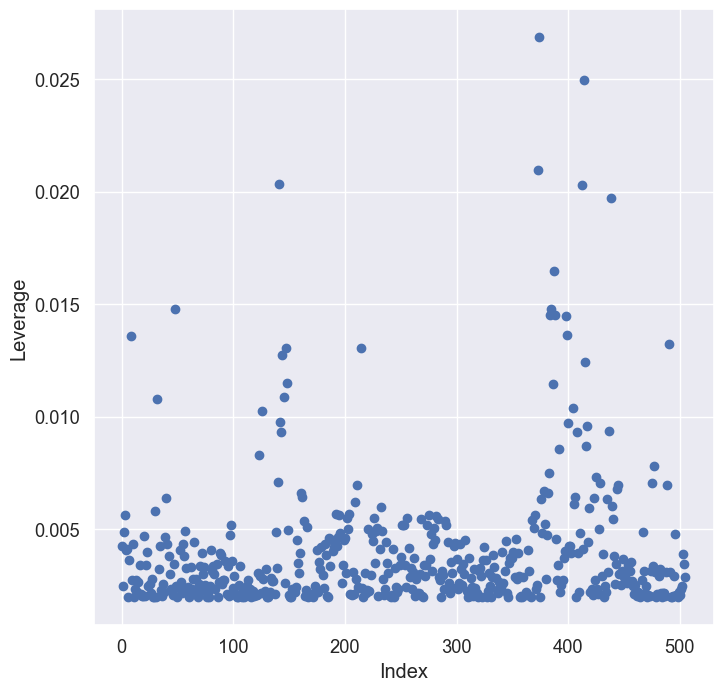

In [ ]:
infl = results.get_influence() # del modelo, obtenga obs influenciales
ax = plt.subplots(figsize=(8,8))[1] # matplotlib object
# scatter of X.shape[0] index to hat_matrix
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
# etiquetas
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
print(np.argmax(infl.hat_matrix_diag), "<- observacion con max leverage")

La idea es graficar los valores ordenaddos de la hat-matrix to identify los valores que pueden se rinfluenciales. Se printea el index de la observacion con el max levergae, es decir, la mas influencial c: 


# Regresion lineal multiple

AHora si viene lo chimba. Se sigue usando ModelSpec() para ajustar el modelo de regresion lineal multiple. Vamos a practicar un modelo con las variables "lstat" y "age".

In [ ]:
X = MS(["lstat", "age"]).fit_transform(Boston) 
X.head(5) # obtenha la nueva matriz de diseño para RLM

,intercept,lstat,age
0,1.0,4.98,65.2
1,1.0,9.14,78.9
2,1.0,4.03,61.1
3,1.0,2.94,45.8
4,1.0,5.33,54.2


In [ ]:
model1 = sm.OLS(y,X) # Atras definimos la rta Y. Solo se le otorga la matriz de diseño
results1 = model1.fit() # modelo ajstado
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


Modelo con variables significativas. Ahora, como esta regresion fue ajustada solo con dos variables; vamos a analizarlas todas en conjunto.

In [ ]:
terms = Boston.columns.drop("medv") # quitamos Y
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [ ]:
# Ajuste matriz de diseño con todito

X = MS(terms).fit_transform(Boston)
model = sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


Note que de manera general, se identifica dos variables NO significativas para el proceso; age e indus.

Vamos a correr un modelo sin dichas variables.

In [ ]:
no_age = Boston.columns.drop(["medv", "age","indus"])
Xma = MS(no_age).fit_transform(Boston)
model1 = sm.OLS(y,Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.4517,4.903,8.454,0.000
crim,-0.1217,0.033,-3.696,0.000
zn,0.0462,0.014,3.378,0.001
chas,2.8719,0.863,3.329,0.001
nox,-18.2624,3.565,-5.122,0.000
rm,3.6730,0.409,8.978,0.000
dis,-1.5160,0.188,-8.078,0.000
rad,0.2839,0.064,4.440,0.000
tax,-0.0123,0.003,-3.608,0.000
ptratio,-0.9310,0.130,-7.138,0.000


Ahora se tiene un modelo con todos su parametros significativos. 

# Bondad de ajuste multivariada

Se procede a realizar los test de bondad de ajuste para identificar que tambien ajusta el modelo.

In [ ]:
print(np.sqrt(results.scale), "RSE del modelo") # RSE
print(results.rsquared, "R^2 del modelo")

4.798034335596367 RSE del modelo
0.7343070437613076 R^2 del modelo


In [ ]:
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [ ]:
# Obvio no servia porqueno habiamos importado eso, careverga

vals = [VIF(X,i) for i in range(1, X.shape[1])] # itera sobre el # columnas

vif = pd.DataFrame({'vif':vals}, # valor para vif
index=X.columns[1:]) # pareja par avalor de vif
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [ ]:
vals = []
for i in range(1, X.values.shape[1]):
    vals.append(VIF(X.values, i))
vals # otra forma de obtener vals

[1.7674859154310125,
 2.2984589077358097,
 3.9871806307570994,
 1.0711677737584042,
 4.369092622844793,
 1.9125324374368864,
 3.0882320397311984,
 3.954036641628298,
 7.445300760069838,
 9.002157663471797,
 1.797059593129779,
 2.8707765008417496]

La funcion VIF toma dos argumentos, el dataframe o array asociado a las observaciones y el indice de la columna con la que se va a trabajar. Por ejemplo, VIF(Boston, 4) analiza los VIF para la variable 4 del df boston. 

# Termino de interaccion

Ahora vamos a trabajar la interaccion en el modelo. Vamos a ver la sintaxis de la interaccion en python

In [ ]:
# introducciendo interacion de lstat con age

X = MS(["lstat",
        "age", 
        ("lstat", "age")]).fit_transform(Boston)

model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


Note que, age de manera indivual no es sifnificativa pero su interaccion con lstat lo es. 

# Transformaciones no lineales a los predictores

Vamos a agregarle cositas mas sabrozas al modelo.

In [ ]:
# agrega el cuadrado de lstat para ajustar el modelo
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          2.23e-133
Time:                        10:55:46   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

En general, hay un mejor ajuste del modelo cuando se toman cuadrados en las formulas.

In [ ]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


The anova_lm() realiza la sgte prueba de hipotesis:

$$H_0: \text{ Termino cuadratico modelo 2 no es necesario}$$

$$H_1: \text{El modelo 2 tiene mejor rendimiento}$$

Dado el valor p asociado a la comparacion del modelo, se rechaza la hipotesis nula a favor de la alterna donde se evidencia que el modelo 2 posee mejor rendimiento respecto al modelo 1. 

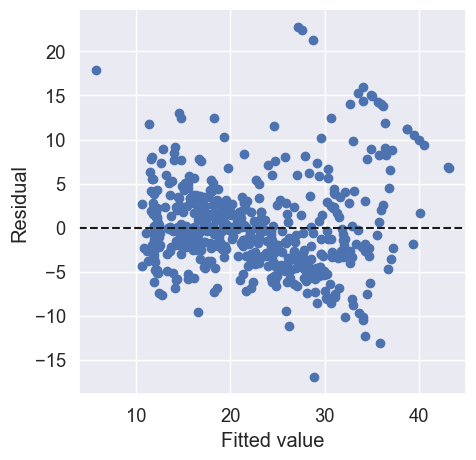

In [ ]:
ax = plt.subplots(figsize=(5,5))[1]
ax.scatter(results3.fittedvalues , results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

Se podria argumentar que los residuales ajustados no se encuentran completamente aleatorios alrededor del cero. Esto es un argumento a favor de probar modelos diferentes. En este caso, intetnemos ajustar un modelo de grado 3. 

In [ ]:
# POlinomio de grado 3
X = MS([poly('lstat', degree=3), 'age']).fit_transform(Boston)
model4 = sm.OLS(y, X)
results4 = model4.fit()
summarize(results4)

,coef,std err,t,P>|t|
intercept,18.0345,0.769,23.450,0.0
"poly(lstat, degree=3)[0]",-177.4532,6.614,-26.832,0.0
"poly(lstat, degree=3)[1]",72.4098,5.377,13.466,0.0
"poly(lstat, degree=3)[2]",-24.0039,5.233,-4.587,0.0
age,0.0656,0.011,6.134,0.0


CLaramente los parametros son significativos. Se evidencia que hubo una mejora del ajuste. ¿Que tanta?

In [ ]:
anova_lm(results3, results4) # recuerde que el 3 es termino cuadratico y el 4 es termino cubico

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,502.0,14165.613251,0.0,NaN,NaN,NaN
1,501.0,13594.619618,1.0,570.993633,21.042723,0.000006


Una pregunta inmediata es si en efecto, el termino cubico afecta el ajuste del modelo dado los residuales. Observe que:


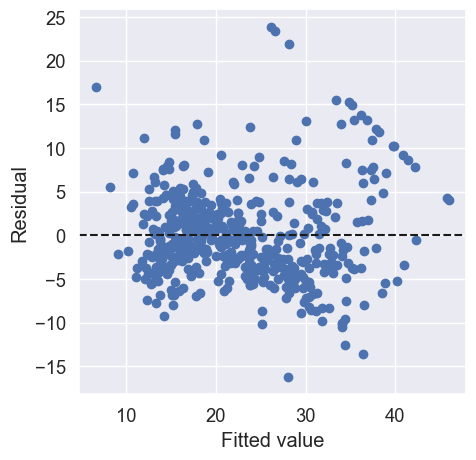

In [ ]:
ax = plt.subplots(figsize=(5,5))[1]
ax.scatter(results4.fittedvalues , results4.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

Pareciese que hubi una mejora. Sin embargo, pareciese haber un patron de n. Haga la prueba del ciego y lo verá. Aun asi, la tabla anova dice que chimba, que sirve. 

# Predictor cualitativo


In [3]:
carseats = load_data("Carseats")
carseats = janitor.clean_names(carseats)
print(carseats.head(4))
print(carseats.shelveloc.unique(), "<-- estos son los niveles")

   sales  compprice  income  advertising  population  price shelveloc  age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   

   education urban   us  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
['Bad', 'Good', 'Medium']
Categories (3, object): ['Bad', 'Good', 'Medium'] <-- estos son los niveles


Note que la variable "shelveloc" es una categorica con 3 niveles. Esta mide si el espacio que tiene el articulo en la venta se catecoriza de esta manera. 
Se procede a aplicar one-hot encoding para transformar las variables categoricas en variables dummies que pueda ser aplicable los metodos de regresion.

In [4]:
df =pd.get_dummies(carseats, columns=["shelveloc", "urban", "us"],dtype=float) # creacion de dummies para tirar la regresion
df.head()

,sales,compprice,income,advertising,population,price,age,education,shelveloc_Bad,shelveloc_Good,shelveloc_Medium,urban_No,urban_Yes,us_No,us_Yes
0,9.50,138,73,11,276,120,42,17,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,11.22,111,48,16,260,83,65,10,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,10.06,113,35,10,269,80,59,12,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,7.40,117,100,4,466,97,55,14,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,4.15,141,64,3,340,128,38,13,1.0,0.0,0.0,0.0,1.0,1.0,0.0


Como en general, una variable dummy toma valores dicotomicos cuando la categorica de la que proviene tiene dos niveles, entonces no tiene sentido en conservar variables como urban_yes; us_Yes; por tal motivo se eliminan

In [5]:
df =pd.get_dummies(carseats, columns=["shelveloc", "urban", "us"],dtype=float, drop_first = True) # creacion de dummies para tirar la regresion
df.head()

,sales,compprice,income,advertising,population,price,age,education,shelveloc_Good,shelveloc_Medium,urban_Yes,us_Yes
0,9.50,138,73,11,276,120,42,17,0.0,0.0,1.0,1.0
1,11.22,111,48,16,260,83,65,10,1.0,0.0,1.0,1.0
2,10.06,113,35,10,269,80,59,12,0.0,1.0,1.0,1.0
3,7.40,117,100,4,466,97,55,14,0.0,1.0,1.0,1.0
4,4.15,141,64,3,340,128,38,13,0.0,0.0,1.0,0.0


Antes de comenzar con el modelamiento de los datos, se ha de tener como se encuentran balanceadas o no las categorias asociadas al modelo. Teniendo eso en mente, vamos a identificar via graficos de barra por categorias, si existen diferencias significativas en los conteos por categorias. Si el desbalance es fuerte, se procede a imputar-nivelar las categorias. Siendo asi:


In [6]:
carseats.head(2)

,sales,compprice,income,advertising,population,price,shelveloc,age,education,urban,us
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


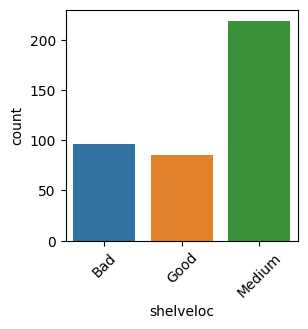

In [7]:
plt.subplots(figsize=(3,3))[1]
sns.countplot(x = "shelveloc", data = carseats)
plt.xticks(rotation = 45)
plt.show()

Malas noticias bro. Esto está descalibrado. Hay una categoria que se hala el doble de cada una de las otras dos. F

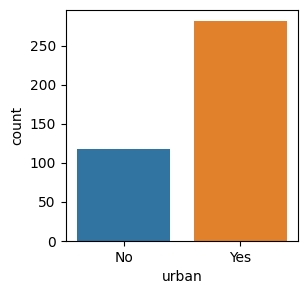

In [8]:
plt.subplots(figsize = (3,3))[1]
sns.countplot(x = "urban", data = carseats)
plt.xticks(rotation = 0)
plt.show()

Esta perra esta loka tambien.

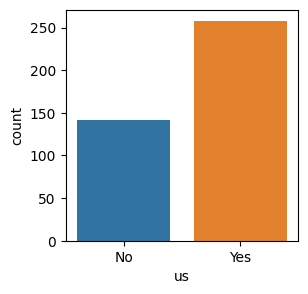

In [9]:
plt.subplots(figsize = (3,3))
sns.countplot(x="us", data = carseats)
plt.xticks(rotation = 0)
plt.show()

En general, los datos se encuentran desalanceados. Se buscaria una forma de tener datos balanceados sin embargo esto podria meter sesgo en el proceso dado que no responde al fenomeno. Vamos a tirar el modelo *sin balancear* los datos. Luego de esto, se procede a realizar los analsis de supuestos. Si no hay mejora entonces luego se balancean. Vamoh!

# Regresion lineal multiple con categorias

Vamos entonces a tirar ese visaje

In [10]:
from sklearn.preprocessing import StandardScaler # Permite ajustar datos escalados. Datos escalados = Mejor modelo
from sklearn.linear_model import LinearRegression # Permite ajustar un modelo de regresion lineal

In [11]:
list(df.columns)

['sales',
 'compprice',
 'income',
 'advertising',
 'population',
 'price',
 'age',
 'education',
 'shelveloc_Good',
 'shelveloc_Medium',
 'urban_Yes',
 'us_Yes']

In [12]:
X = df[['compprice',
 'income',
 'advertising',
 'population',
 'price',
 'age',
 'education',
 'shelveloc_Good',
 'shelveloc_Medium',
 'urban_Yes',
 'us_Yes']].values
Y = df["sales"].values # Los convierte en un vector de datos. ESTO ES UN ARRAY
X[:4]

array([[138.,  73.,  11., 276., 120.,  42.,  17.,   0.,   0.,   1.,   1.],
       [111.,  48.,  16., 260.,  83.,  65.,  10.,   1.,   0.,   1.,   1.],
       [113.,  35.,  10., 269.,  80.,  59.,  12.,   0.,   1.,   1.,   1.],
       [117., 100.,   4., 466.,  97.,  55.,  14.,   0.,   1.,   1.,   1.]])

In [14]:
# Supongamos que tienes un DataFrame llamado 'df'
y = df["sales"]  # variable Y
vble_exlude = ["sales"]
# Seleccionar todas las variables excepto Y
x = df.drop(vble_exlude, axis = 1).values
# Ya se tiene la matriz x y el vector y de rta

In [16]:
# Estandarizando las variables

sc_x = StandardScaler() 
sc_y = StandardScaler() 


# se estndariza las variables asociadas al modelo (las continuas)
X_std = sc_x.fit_transform(x) 
Y_std = sc_y.fit_transform(y) 


ValueError: Expected 2D array, got 1D array instead:
array=[ 9.5  11.22 10.06  7.4   4.15 10.81  6.63 11.85  6.54  4.69  9.01 11.96
  3.98 10.96 11.17  8.71  7.58 12.29 13.91  8.73  6.41 12.13  5.08  5.87
 10.14 14.9   8.33  5.27  2.99  7.81 13.55  8.25  6.2   8.77  2.67 11.07
  8.89  4.95  6.59  3.24  2.07  7.96 10.43  4.12  4.16  4.56 12.44  4.38
  3.91 10.61  1.42  4.42  7.91  6.92  4.9   6.85 11.91  0.91  5.42  5.21
  8.32  7.32  1.82  8.47  7.8   4.9   8.85  9.01 13.39  7.99  9.46  6.5
  5.52 12.61  6.2   8.55 10.64  7.7   4.43  9.14  8.01  7.52 11.62  4.42
  2.23  8.47  8.7  11.7   6.56  7.95  5.33  4.81  4.53  8.86  8.39  5.58
  9.48  7.45 12.49  4.88  4.11  6.2   5.3   5.07  4.62  5.55  0.16  8.55
  3.47  8.98  9.    6.62  6.67  6.01  9.31  8.54  5.08  8.8   7.57  7.37
  6.87 11.67  6.88  8.19  8.87  9.34 11.27  6.52  4.96  4.47  8.41  6.5
  9.54  7.62  3.67  6.44  5.17  6.52 10.27 12.3   6.03  6.53  7.44  0.53
  9.09  8.77  3.9  10.51  7.56 11.48 10.49 10.77  7.64  5.93  6.89  7.71
  7.49 10.21 12.53  9.32  4.67  2.93  3.63  5.68  8.22  0.37  6.71  6.71
  7.3  11.48  8.01 12.49  9.03  6.38  0.    7.54  5.61 10.48 10.66  7.78
  4.94  7.43  4.74  5.32  9.95 10.07  8.68  6.03  8.07 12.11  8.79  6.67
  7.56 13.28  7.23  4.19  4.1   2.52  3.62  6.42  5.56  5.94  4.1   2.05
  8.74  5.68  4.97  8.19  7.78  3.02  4.36  9.39 12.04  8.23  4.83  2.34
  5.73  4.34  9.7  10.62 10.59  6.43  7.49  3.45  4.1   6.68  7.8   8.69
  5.4  11.19  5.16  8.09 13.14  8.65  9.43  5.53  9.32  9.62  7.36  3.89
 10.31 12.01  4.68  7.82  8.78 10.    6.9   5.04  5.36  5.05  9.16  3.72
  8.31  5.64  9.58  7.71  4.2   8.67  3.47  5.12  7.67  5.71  6.37  7.77
  6.95  5.31  9.1   5.83  6.53  5.01 11.99  4.55 12.98 10.04  7.22  6.67
  6.93  7.8   7.22  3.42  2.86 11.19  7.74  5.36  6.97  7.6   7.53  6.88
  6.98  8.75  9.49  6.64 11.82 11.28 12.66  4.21  8.21  3.07 10.98  9.4
  8.57  7.41  5.28 10.01 11.93  8.03  4.78  5.9   9.24 11.18  9.53  6.15
  6.8   9.33  7.72  6.39 15.63  6.41 10.08  6.97  5.86  7.52  9.16 10.36
  2.66 11.7   4.69  6.23  3.15 11.27  4.99 10.1   5.74  5.87  7.63  6.18
  5.17  8.61  5.97 11.54  7.5   7.38  7.81  5.99  8.43  4.81  8.97  6.88
 12.57  9.32  8.64 10.44 13.44  9.45  5.3   7.02  3.58 13.36  4.17  3.13
  8.77  8.68  5.25 10.26 10.5   6.53  5.98 14.37 10.71 10.26  7.68  9.08
  7.8   5.58  9.44  7.9  16.27  6.81  6.11  5.81  9.64  3.9   4.95  9.35
 12.85  5.87  5.32  8.67  8.14  8.44  5.47  6.1   4.53  5.57  5.35 12.57
  6.14  7.41  5.94  9.71].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Note que se tiene un error. Este error es asociado a la dimension de y. Se pide que esté con un reshape (1,-11); pero esto que significa?
Resulta que el standarscaler espera un objeto bidimensional y el objeto hasta ahora, Y es de la forma unidimensional. Una forma de verlo es que esto es hasta el momento una fila de datos y el espera un formato tipo "dataframe"; esto es, para una fila, existe una observacion para la variable de interes. Entonces es necesario darle la estructura de dataframe. Note que la salida anterior sale una secuencia de numeros. Asi entonces se quier un formato en df, asi:

In [17]:
y = df["sales"].values.reshape(-1, 1) 
y[:4] # se muestran los primeros 4 valores

array([[ 9.5 ],
       [11.22],
       [10.06],
       [ 7.4 ]])

In [18]:
X_std = sc_x.fit_transform(x) 
#print(X_std)
Y_std = sc_y.fit_transform(y) 
#print(Y_std)

Ahora el standartScaler no presenta ningun problema en x ni y. 

In [28]:
slr  = LinearRegression() # invoque el objeto de regresion lineal
mod =slr.fit(X_std, Y_std) # ajuste el modelo de regresion
mod

LinearRegression()

# Ajustandolo mas breve con scikit learn

In [29]:
# Librerias para entrenar y crear el modelo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics # para metricas 

In [37]:
# Indices de vble respuesta y covariables 
X_cols = list(set(df.columns)-set(["sales"])) # nombres de las covariables
Y_col = ["sales"] # variable respuesta (indice)

# Creacion de matriz de diseño y variable respuesta y
X = df[X_cols].values
y = df[Y_col].values

# Hasta aca, solo se ha creado los dos objetos X, Y que son respectivamente, las matrices asociadas

X_train, X_test, Y_train, Y_test = train_test_split(X,y, random_state=1998) # particion de entrenamiento y prueba

# escalamiento de variables (objetos)

sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

# Escalando las variables

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(Y_train)
y_test = sc_y.transform(Y_test)

# Ajuste del modelo

model = LinearRegression().fit(X_train, Y_train) # modelo ajustado
y_pred = model.predict(X_test)

 

In [40]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(Y_test, y_pred) # diferencia entre prueba y predicho, ajustado - real
r2 = metrics.r2_score(Y_test, y_pred) # r cuadrado modelo

print("MSE: ", mse)
print("R2:  ", r2)

MSE:  1.1241335338080192
R2:   0.880896549088242


En general, el modelo posee un MSE de 1.12 y un R2 relativamente alto. Esto son buenos indicios para el modelo. Se procede a realizar verificacion de supuestos del modelo

# Supuestos del modelo

Vamos a intentar hacer las verificaciones de los supuestos con scklearn.

In [53]:
 # residuales del modelo
errores = Y_train - model.predict(X_train) # esto es, reales - predichos (muetra de prueba)

Hasta el momento, estos son los residuales/errores del modelo. Estos residuales son aquellos con los que se ha de trabajar; se ha de verificar que cumplan los supuestos de normalidad, no autocorrelacion y demas. Vamos a verificarlos

# Normalidad

In [52]:
from scipy.stats import shapiro
shapiro_test = shapiro(errores)
print("Valor p de la prueba de Shapiro-Wilk:", shapiro_test[1])

Valor p de la prueba de Shapiro-Wilk: 0.7479827404022217


No se rechaza la hipotesis nula por tanto se concluye que los residuales son normales

# Independencia

In [60]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(errores) 

array([2.09505271])

Modelo con errores independientes acorde al estadistico de Durbin-Watson. Ahora, mirandolo bien, scikit learn vale verga respecto a todo esto. No tiene VIF, no tiee atipicos, meh. 

# Ajuste modelo con stat models y verificacion de supuestos

In [84]:
allvars = list(carseats.columns.drop('sales'))
y = carseats['sales']
final = allvars + [('income', 'advertising'),
('price', 'age')]
X = MS(final).fit_transform(carseats)
model = sm.OLS(y, X)
print(summarize(model.fit()), "---------------------------------------------------------------------------")

                      coef  std err       t  P>|t|
intercept           6.5756    1.009   6.519  0.000
compprice           0.0929    0.004  22.567  0.000
income              0.0109    0.003   4.183  0.000
advertising         0.0702    0.023   3.107  0.002
population          0.0002    0.000   0.433  0.665
price              -0.1008    0.007 -13.549  0.000
shelveloc[Good]     4.8487    0.153  31.724  0.000
shelveloc[Medium]   1.9533    0.126  15.531  0.000
age                -0.0579    0.016  -3.633  0.000
education          -0.0209    0.020  -1.063  0.288
urban[Yes]          0.1402    0.112   1.247  0.213
us[Yes]            -0.1576    0.149  -1.058  0.291
income:advertising  0.0008    0.000   2.698  0.007
price:age           0.0001    0.000   0.801  0.424 ---------------------------------------------------------------------------


In [83]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          6.14e-166
Time:                        15:40:06   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              6.5756      1.009      6.519      0.000       4.592       8.559
compprice              0.0929      0.004     22.567      0.000       0.085       0.101
income                 0.0109      0.003      4.183      0.000       0.006       0.016
advertising            0.0702      0.023      3.107      0.002       0.026       0.115
population             0.0002      0.000      0.433      0.665      -0.001       0.001
price                 -0.1008      0.007    -13.549      0.000      -0.115      -0.086
shelveloc[Good]        4.8487      0.153     31.724      0.000       4.548       5.149
shelveloc[Medium]      1.9533      0.126     15.531      0.000       1.706       2.201
age                   -0.0579      0.016     -3.633      0.000      -0.089      -0.027
education             -0.0209      0.020     -1.063      0.288      -0.059       0.018
urban[Yes]             0.1402      0.112      1.247      0.213      -0.081       0.361
us[Yes]               -0.1576      0.149     -1.058      0.291      -0.450       0.135
income:advertising     0.0008      0.000      2.698      0.007       0.000       0.001
price:age              0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Cross validation

Dado que la base de datos posee pocos datos entonces se realizará el analisis con LOOCV (Leavo One Out Cross-Validation) que permite tener un buen equilibrio entre sesgo y varianza. De entrada es un metodo que es pesado computacionalmente pero permite tener mejor rendimiento. Entonces, comenzando de cero

In [1]:
# librerias base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
# librerias de trabajo
import janitor
import seaborn as sns
# Otras librerias
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)

# Librerias para entrenar y crear el modelo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics # para metricas 
from scipy.stats import shapiro # test de shapiro

c:\Users\jhongamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\lazy_loader\__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)


In [65]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score
df = load_data("Carseats")
df = janitor.clean_names(df)
print(df.head(3))
df.shape


   sales  compprice  income  advertising  population  price shelveloc  age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   

   education urban   us  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  


(400, 11)

In [66]:
df =pd.get_dummies(df, columns=["shelveloc", "urban", "us"],dtype=float, drop_first = True) # creacion de dummies para tirar la regresion
df.head()
# Se prepara los datos para crear la matriz

,sales,compprice,income,advertising,population,price,age,education,shelveloc_Good,shelveloc_Medium,urban_Yes,us_Yes
0,9.50,138,73,11,276,120,42,17,0.0,0.0,1.0,1.0
1,11.22,111,48,16,260,83,65,10,1.0,0.0,1.0,1.0
2,10.06,113,35,10,269,80,59,12,0.0,1.0,1.0,1.0
3,7.40,117,100,4,466,97,55,14,0.0,1.0,1.0,1.0
4,4.15,141,64,3,340,128,38,13,0.0,0.0,1.0,0.0


In [67]:
cv = LeaveOneOut() # create loocv procedure

Para la aplicacion de LOOCV es necesario separar las covariables de la variable respuesta. Dado esto entonces:


In [68]:
X = df.drop('sales', axis=1)
y = df['sales']

In [69]:
model = LinearRegression() # objeto modelo
# se ha de construir la matriz de datos con one-hot encoding

In [70]:
# Esta funcion nos calcula los 
scores = cross_val_score(model,
                        X,
                        y, 
                        scoring='neg_mean_absolute_error',
                        cv=cv, n_jobs=-1)

len(scores) # se tiene un total de 400 mse

In [77]:
mae = np.mean(np.absolute(scores))
print(round(mae,2), "MAE")

0.83 MAE
